In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("Data/train.csv")
df.head()

,col1,col2,output
0,-38.366669,113.000000,1
1,-39.818572,123.943369,1
2,-55.638240,114.551862,1
3,-36.378005,95.616515,1
4,-39.366669,112.000000,1


In [4]:
df.shape

(1278, 3)

In [5]:
df['output'].value_counts()

1    770
0    508
Name: output, dtype: int64

<AxesSubplot:xlabel='output', ylabel='count'>

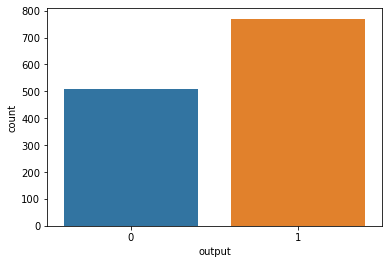

In [6]:
sns.countplot(x='output', data=df)

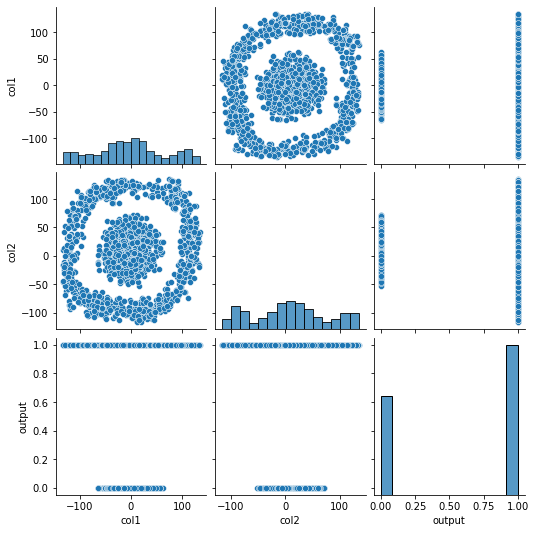

In [7]:
sns.pairplot(df)

<h2>Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
X = df.drop(['output'], axis=1)
Y = df['output']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [10]:
lr = LogisticRegression()
lr_model = lr.fit(x_train, y_train)

In [11]:
train_score = lr_model.score(x_train, y_train)
print(train_score)

0.5995525727069351


In [12]:
test_score = lr.score(x_test, y_test)
print(test_score)


0.609375


<h2>  SVM

In [13]:
# linear model

model_linear = SVC(kernel='linear', C=1)
model_linear.fit(x_train, y_train)

# predict
y_pred = model_linear.predict(x_test)

#Model Performance
tr_score = model_linear.score(x_test, y_test)
print(tr_score)

tes_score = model_linear.score(x_test, y_test)
print(tes_score)

0.609375
0.609375


In [14]:
# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(x_train, y_train)

# predict
y_pred = non_linear_model.predict(x_test)

#Model Performance
tr_rbf_score = non_linear_model.score(x_train,y_train)
print(tr_rbf_score)

tes_rbf_score = non_linear_model.score(x_test,y_test)
print(tes_rbf_score)

1.0
1.0


In [15]:

from pickle import dump
dump(non_linear_model, open('Pickle/svm_rbf.pkl', 'wb'))


In [16]:
from pickle import load
def predict(arr):
        
    # Loading pretrained logistic classifier from pickle file
    classifier = load(open('Pickle/svm_rbf.pkl', 'rb'))
    
    # Prediction
    prediction = classifier.predict(arr)
    
    return prediction

In [17]:
Value_1=input('Enter Value_1 :')
Value_2=input('Enter Value_2 :')
arr = np.array([Value_1,Value_2]).reshape(1,-1)
 
prediction = predict(arr)
print(prediction)

Enter Value_1 :123
Enter Value_2 :61.2479
[1]
